In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
from google.colab import files
files.upload()

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p /content

100% 611M/612M [00:07<00:00, 82.9MB/s]
100% 612M/612M [00:07<00:00, 81.2MB/s]


In [0]:
!pip install kaggle

In [0]:
!unzip \*.zip

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [0]:
# Reading the input images 
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "/content/train/{0}/".format(i)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")

            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [8]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 12s 377us/step - loss: 1.3355 - accuracy: 0.6213 - val_loss: 0.1887 - val_accuracy: 0.9517
Epoch 2/20
31368/31368 [==============================] - 6s 177us/step - loss: 0.2638 - accuracy: 0.9199 - val_loss: 0.0587 - val_accuracy: 0.9851
Epoch 3/20
31368/31368 [==============================] - 5s 175us/step - loss: 0.1562 - accuracy: 0.9534 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 4/20
31368/31368 [==============================] - 5s 173us/step - loss: 0.1184 - accuracy: 0.9640 - val_loss: 0.0328 - val_accuracy: 0.9913
Epoch 5/20
31368/31368 [==============================] - 6s 195us/step - loss: 0.0916 - accuracy: 0.9724 - val_loss: 0.0228 - val_accuracy: 0.9943
Epoch 6/20
31368/31368 [==============================] - 5s 173us/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0278 - val_accuracy: 0.9931
Epoch 7/20
31368/31368 [==============================] - 5s 1

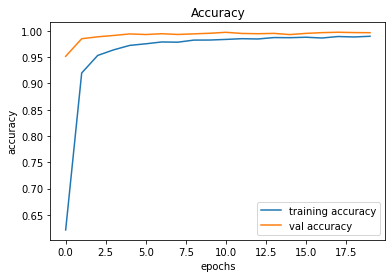

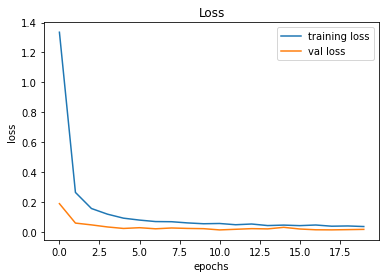

In [10]:
#using 20 epochs 
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [0]:
#Predicting with the test data
y_test=pd.read_csv("/content/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9721298495645289

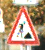

In [14]:
from google.colab.patches import cv2_imshow
            
img=cv2.imread('/content/test/00008.png')
cv2_imshow(img)

